# Challenge 1

## Import all the libraries that are necessary

In [5]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

pd.options.display.max_columns = None

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [130]:
fitbit=pd.read_csv('data/Fitbit2.csv')
fitbit.head(2)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.0,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.4,92.086331,May,5


**ANALISIS EXPLORATORIO DEL DATAFRAME**

In [131]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [132]:
fitbit.isnull().sum()

Date                          0
Calorie burned                0
Steps                         0
Distance                      0
Floors                        0
Minutes Sedentary             0
Minutes Lightly Active        0
Minutes Fairly Active         0
Minutes Very Active           0
Activity Calories             0
MinutesOfSleep                0
MinutesOfBeingAwake           0
NumberOfAwakings              0
LengthOfRestInMinutes         0
Distance_miles                0
Days                          0
Days_encoded                  0
Work_or_Weekend               0
Hours Sleep                   0
Sleep efficiency              0
Yesterday_sleep               0
Yesterday_sleep_efficiency    0
Months                        0
Months_encoded                0
dtype: int64

In [133]:
fitbit.shape

(367, 24)

## Coding Session I

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

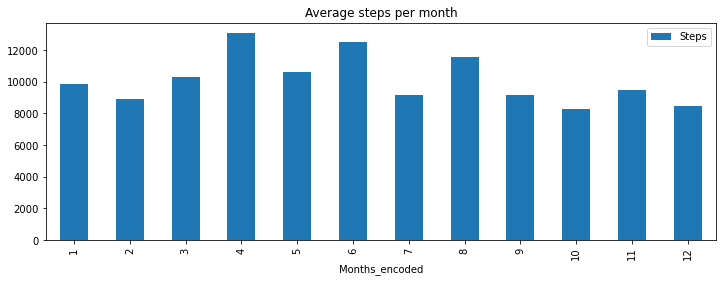

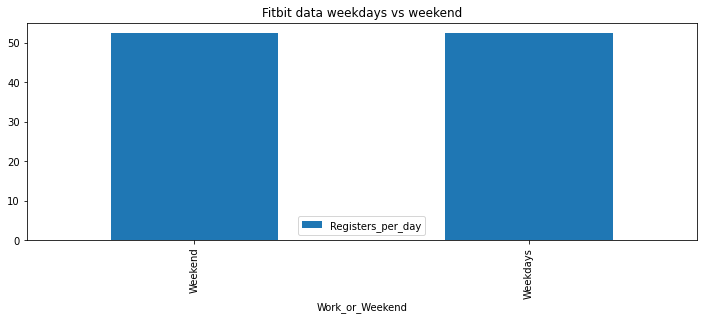

In [152]:
steps_month = fitbit.groupby("Months_encoded")["Steps"].mean().round(2).reset_index()

plt.rcParams["figure.figsize"] = (12,4)
steps_month.plot.bar(x="Months_encoded", y="Steps", title="Average steps per month")
plt.show();

#ax = plt.axes() # para poder cambiar el estilo de los ejes
#ax.set_facecolor("white") # poner el fondo en blanco
#plt.plot(steps_month["Months_encoded"], steps_month["Steps"])
#plt.xlabel("Months") # para poner etiqueta en el eje x
#plt.ylabel("Total_steps") # para poner etiqueta en el eje y
#plt.title("Average steps per month") # para poner el título
#plt.show();

registers_week_weekend = fitbit.groupby("Work_or_Weekend")["Date"].count().reset_index()
registers_week_weekend["Work_or_Weekend"].replace(to_replace=0, value="Weekend", inplace=True)
registers_week_weekend["Work_or_Weekend"].replace(to_replace=1, value="Weekdays", inplace=True)
def registers_day(x):
    if x == "Weekend":
        return 2
    elif x == "Weekdays":
        return 5
registers_week_weekend["Registers_per_day"] = registers_week_weekend["Date"] / registers_week_weekend["Work_or_Weekend"].apply(registers_day)
registers_week_weekend.plot.bar(x="Work_or_Weekend", y="Registers_per_day", title="Fitbit data weekdays vs weekend")
plt.show();

## Coding Session II 

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

In [ ]:
# enter codes here
